In [1]:
# load sample dataset

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import torch
import tensorflow as tf

2023-05-27 11:16:24.610425: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-27 11:16:25.145014: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
#test = torch.load('./dataset/test_gw.pt')

In [3]:
file = h5py.File('./dataset/data_both.h5', 'r')

In [4]:
file.keys()

<KeysViewHDF5 ['test', 'train']>

In [5]:
train = np.array(file['train'])
test = np.array(file['test'])

In [7]:
print(train.shape, test.shape)

(9861, 1300) (2459, 1300)


In [ ]:
def shift_data(inputs):
    if len(inputs.shape) == 1:
        inputs = inputs[np.newaxis]
    for i in range(inputs.shape[0]):
        shift_int = np.random.randint(1, 200, size=1, dtype=np.int)
        zero_vecs = np.zeros([1, inputs.shape[1]])
        zero_vecs[:, :-shift_int[0]] = inputs[i, shift_int[0]:]
        inputs[i, :] = zero_vecs[:,:]
    return inputs

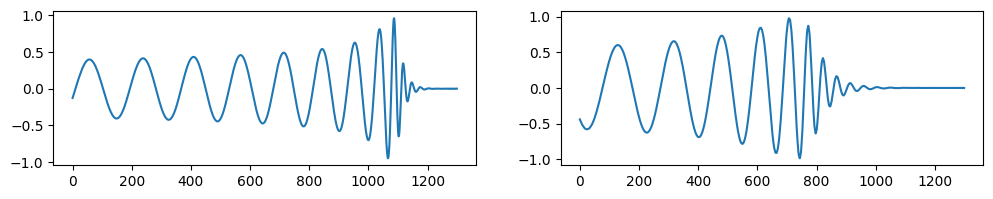

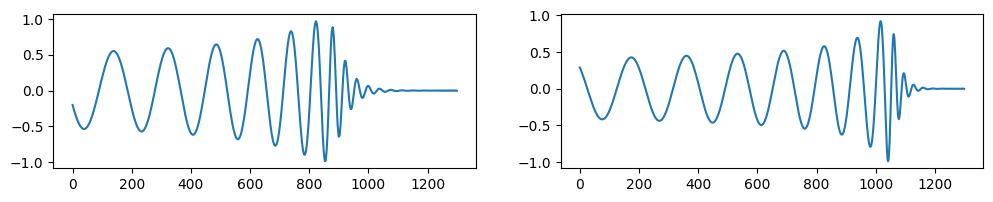

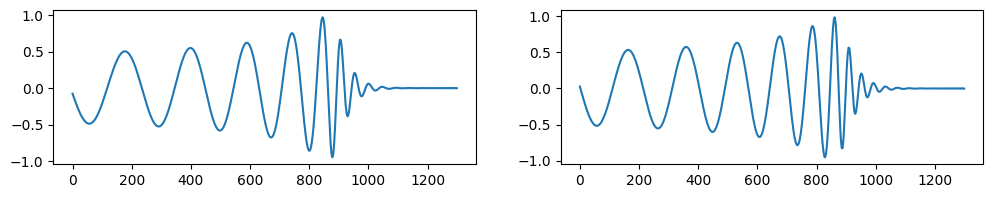

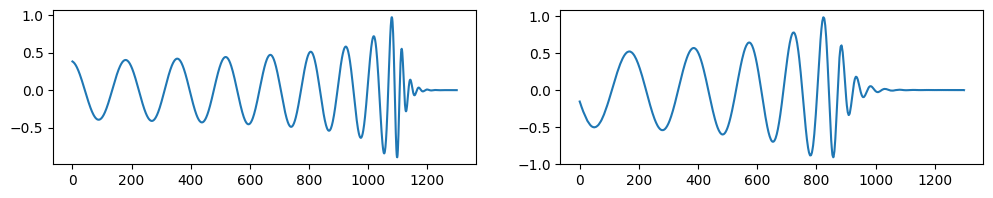

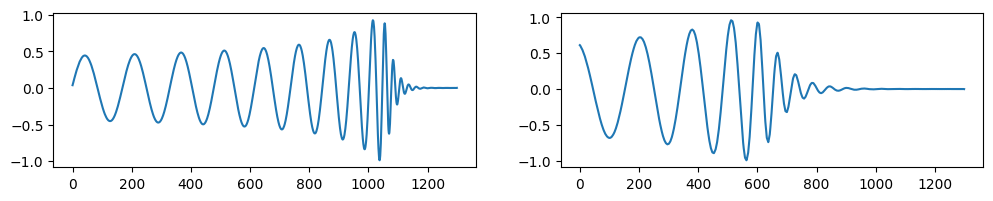

In [8]:
for idx in range(5):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,2))
    ax1.plot(train[idx])
    ax2.plot(test[idx])
    plt.show()

In [9]:
from scipy.signal import find_peaks

In [10]:
# add Gaussian Noise
def get_noisy_input(original, SNR):
    noisy_input = original + np.random.normal(0,1/SNR,original.shape)
    return noisy_input

In [14]:
peaks =[]
for wave in test:
    peaks_, _ = find_peaks(wave, height=0)
    peaks.append(max(peaks_))

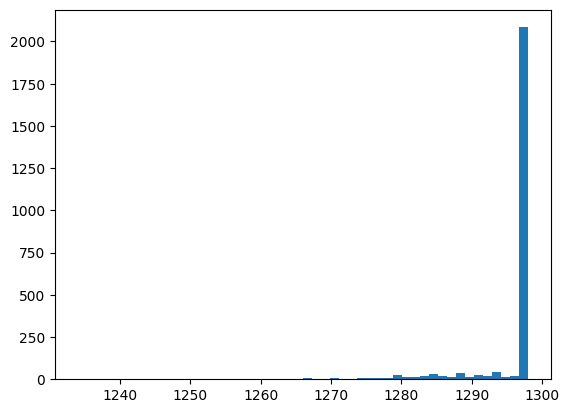

In [17]:
plt.hist(peaks, bins=50)
plt.show()

In [13]:
peaks

array([ 127,  129,  319,  480,  612,  707,  772,  822,  867,  913,  958,
       1004, 1006, 1048, 1050, 1052, 1090, 1092, 1094, 1096, 1098, 1100,
       1102, 1104, 1106, 1108, 1130, 1132, 1134, 1136, 1138, 1140, 1142,
       1144, 1146, 1148, 1150, 1152, 1154, 1174, 1176, 1178, 1180, 1182,
       1184, 1186, 1188, 1190, 1192, 1194, 1196, 1198, 1200, 1202, 1204,
       1206, 1212, 1214, 1216, 1218, 1220, 1222, 1224, 1226, 1228, 1230,
       1232, 1234, 1236, 1238, 1240, 1242, 1244, 1246, 1248, 1250, 1252,
       1254, 1256, 1258, 1260, 1262, 1264, 1266, 1268, 1270, 1272, 1274,
       1276, 1278, 1280, 1282, 1284, 1286, 1288, 1290, 1292, 1294, 1296,
       1298])

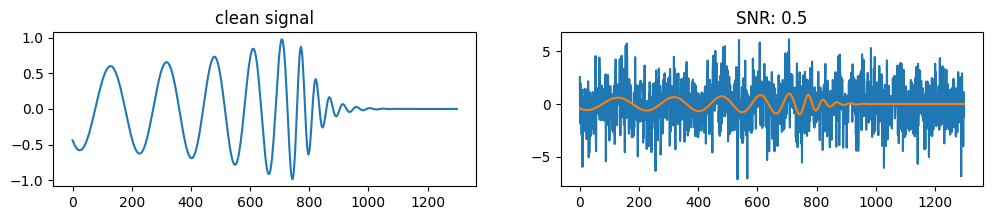

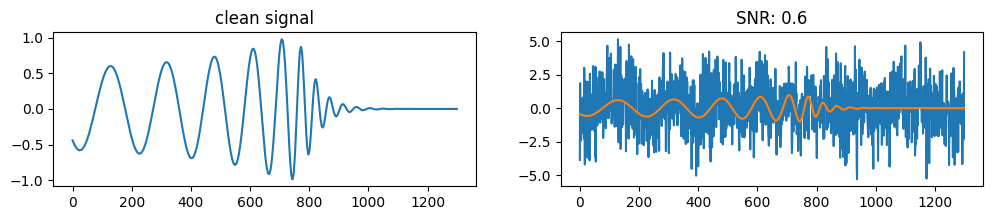

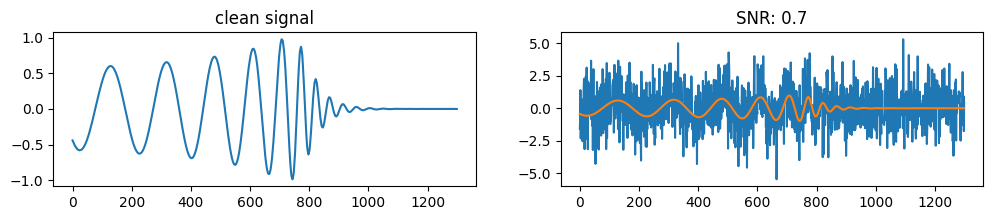

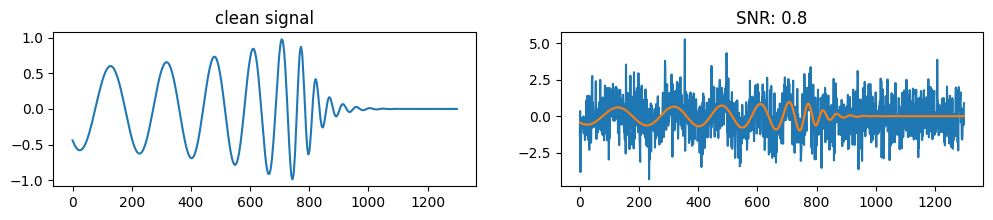

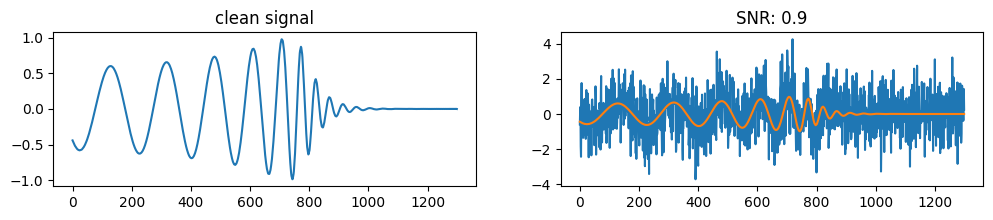

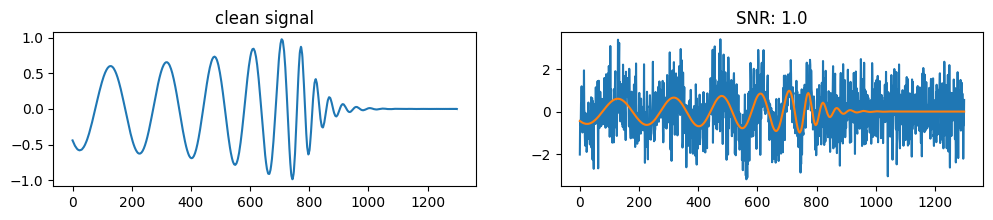

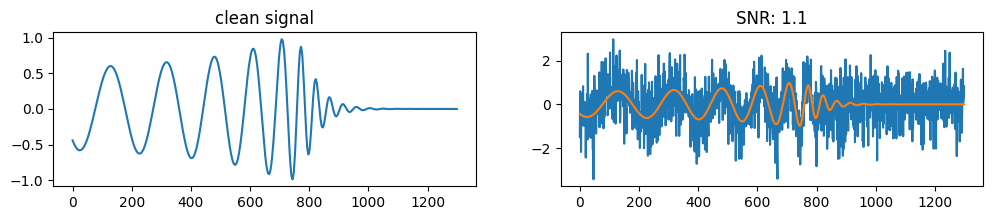

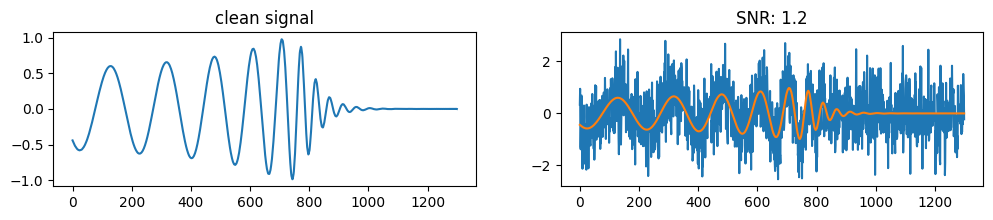

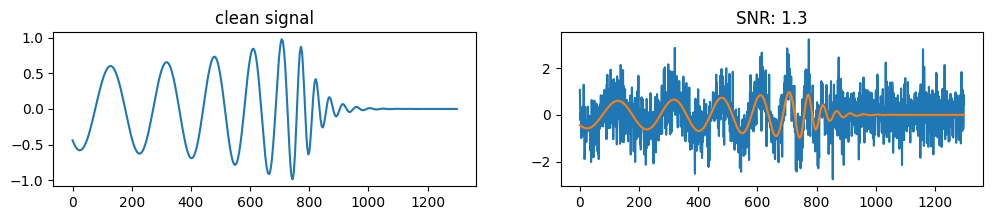

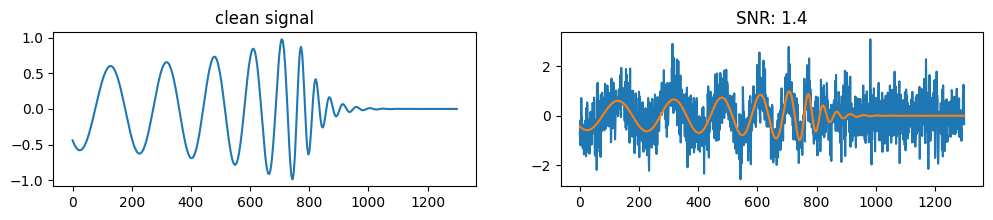

In [34]:
for i in range(10):
    SNR = 0.5 + i/10    
    original = test[0]
    noisy = get_noisy_input(original=original, SNR=SNR)
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,2))
    plt.title('SNR: ' + str(SNR))
    ax1.plot(original)
    ax1.set_title('clean signal')
    ax2.plot(noisy)
    ax2.plot(original)

    plt.show()

In [36]:
def shift_data(inputs):
    if len(inputs.shape) == 1:
        inputs = inputs[np.newaxis]
    for i in range(inputs.shape[0]):
        shift_int = np.random.randint(1, 200, size=1, dtype=np.int)
        zero_vecs = np.zeros([1, inputs.shape[1]])
        zero_vecs[:, :-shift_int[0]] = inputs[i, shift_int[0]:]
        inputs[i, :] = zero_vecs[:,:]
    return inputs

In [ ]:
for i in range(10):
    SNR = 0.5 + i/10    
    original = test[0]
    noisy = get_noisy_input(original=original, SNR=SNR)
    shifted_noisy = shift_data(noisy)
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,2))
    plt.title('SNR: ' + str(SNR))
    ax1.plot(original)
    ax1.set_title('nos')
    ax2.plot(noisy)
    ax2.plot(original)

    plt.show()